# Tipo cambio de compra y de venta del dólar de los Estados Unidos de América
> Referencia del Banco Central de Costa Rica en colones costarricenses

### Paso 1: Importar datos de un archivo CSV a un DataFrame de Pandas

# Estudiante: Juan Carlos Rivera Elizondo.

In [25]:
import pandas as pd

ruta_archivo_csv = "historico_tipo_cambio.csv"

df = pd.read_csv(ruta_archivo_csv,delimiter=';')

df

,DIA,COMPRA,VENTA,Unnamed: 3,Unnamed: 4
0,1 Ene 1983,44.95,45.45,NaN,NaN
1,2 Ene 1983,44.95,45.45,NaN,NaN
2,3 Ene 1983,44.95,45.45,NaN,NaN
3,4 Ene 1983,44.95,45.45,NaN,NaN
4,5 Ene 1983,44.95,45.45,NaN,NaN
...,...,...,...,...,...
15130,4 May 2024,503.94,511.51,NaN,NaN
15131,5 May 2024,503.94,511.51,NaN,NaN
15132,6 May 2024,503.94,511.51,NaN,NaN
15133,7 May 2024,504.53,512.28,NaN,NaN


## Limpiar y procesar el DataFrame
El DataFrame df tiene las siguientes columnas:

- DIA: Esta columna contiene las fechas del tipo de cmabio.
- COMPRA: Esta columna contiene los precios de compra del dólar.
- VENTA: Esta columna contiene los precios de venta del dólar.
- Unnamed: 3: Esta columna contiene datos no deseados y se puede eliminar.
- Unnamed: 4: Esta columna contiene datos no deseados y se puede eliminar.

In [26]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (15135, 5)
Columnas:  Index(['DIA', 'COMPRA', 'VENTA', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Tipado: 
 DIA            object
COMPRA        float64
VENTA         float64
Unnamed: 3    float64
Unnamed: 4    float64
dtype: object


In [27]:
# Eliminar las columnas en los índices 2 y 3 (asumiendo que 'Unnamed: 3' está en el índice 2 y 'Unnamed: 4' en el índice 3)
df.drop(columns=df.iloc[:, 3:], axis=1, inplace=True) # [3:] selecciona todas las columnas a partir del índice 3 (incluido)


In [28]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,DIA,COMPRA,VENTA
0,1 Ene 1983,44.95,45.45
1,2 Ene 1983,44.95,45.45
2,3 Ene 1983,44.95,45.45
3,4 Ene 1983,44.95,45.45
4,5 Ene 1983,44.95,45.45


Convertir la columna 'DIA' a formato de fecha:

In [29]:
# Diccionario de meses en español
meses_español = {
    "ene": "Jan",
    "feb": "Feb",
    "mar": "Mar",
    "abr": "Apr",
    "may": "May",
    "jun": "Jun",
    "jul": "Jul",
    "ago": "Aug",
    "set": "Sep",
    "oct": "Oct",
    "nov": "Nov",
    "dic": "Dec"
}

# Columna 'DIA' con fechas de texto en formato "27 marzo 2024"

# Recorrer cada fecha de texto en la columna 'DIA'
for i in df.index:
    fecha_texto = df.loc[i, 'DIA']

    # Eliminar espacios en blanco antes de dividir
    fecha_texto_sin_espacios = fecha_texto.strip()

    # Dividir la fecha de texto en partes (día, mes, año)
    partes_fecha = fecha_texto_sin_espacios.split()

    # Convertir el mes a inglés usando el diccionario
    mes_ingles = meses_español[partes_fecha[1].lower()]

    # Reconstruir la fecha de texto con el mes en inglés
    fecha_texto_ingles = f"{partes_fecha[0]} {mes_ingles} {partes_fecha[2]}"

    # Convertir la fecha de texto en inglés a un objeto datetime
    try:
        fecha_datetime = pd.to_datetime(fecha_texto_ingles, format="%d %b %Y")
        df.loc[i, 'DIA'] = fecha_datetime
    except ValueError:
        print(f"Error al convertir la fecha: {fecha_texto}")

In [31]:
# Definir el formato de la fecha de texto
formato_fecha = "%d %b %Y"

# Convertir la columna 'DIA' a un objeto datetime
df['DIA'] = pd.to_datetime(df['DIA'], format="%d %b %Y")

In [32]:
# Definir series
anios = df['DIA']
compra = df['COMPRA']
venta = df['VENTA']

In [33]:
df

,DIA,COMPRA,VENTA
0,1983-01-01,44.95,45.45
1,1983-01-02,44.95,45.45
2,1983-01-03,44.95,45.45
3,1983-01-04,44.95,45.45
4,1983-01-05,44.95,45.45
...,...,...,...
15130,2024-05-04,503.94,511.51
15131,2024-05-05,503.94,511.51
15132,2024-05-06,503.94,511.51
15133,2024-05-07,504.53,512.28


### 1. Evolución del tipo de cambio de compra y venta a lo largo del tiempo:

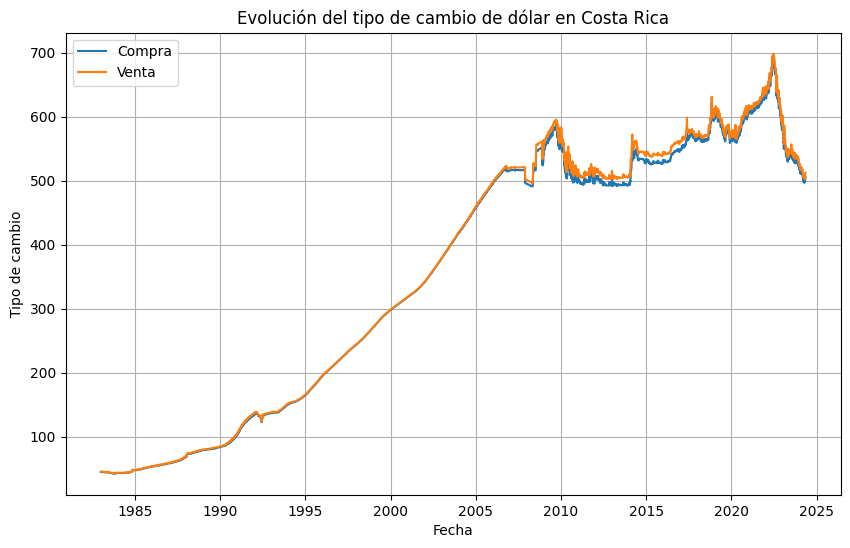

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
data = df.copy()

# Selección de fechas
fechas = data["DIA"]

# Tipo de cambio de compra
tipo_cambio_compra = data["COMPRA"]

# Tipo de cambio de venta
tipo_cambio_venta = data["VENTA"]

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(fechas, tipo_cambio_compra, label="Compra")
plt.plot(fechas, tipo_cambio_venta, label="Venta")
plt.xlabel("Fecha")
plt.ylabel("Tipo de cambio")
plt.title("Evolución del tipo de cambio de dólar en Costa Rica")
plt.legend()
plt.grid(True)
plt.show()



### 2. Distribución del tipo de cambio de compra y venta 2020 2025 (Dos Graficos):

En este ejercicio, debe visualizar la distribución del tipo de cambio de compra y venta en el período comprendido entre los años 2020 y 2025. Para ello, realizaremos dos subgráficos separados, uno para el tipo de cambio de compra y otro para el tipo de cambio de venta.

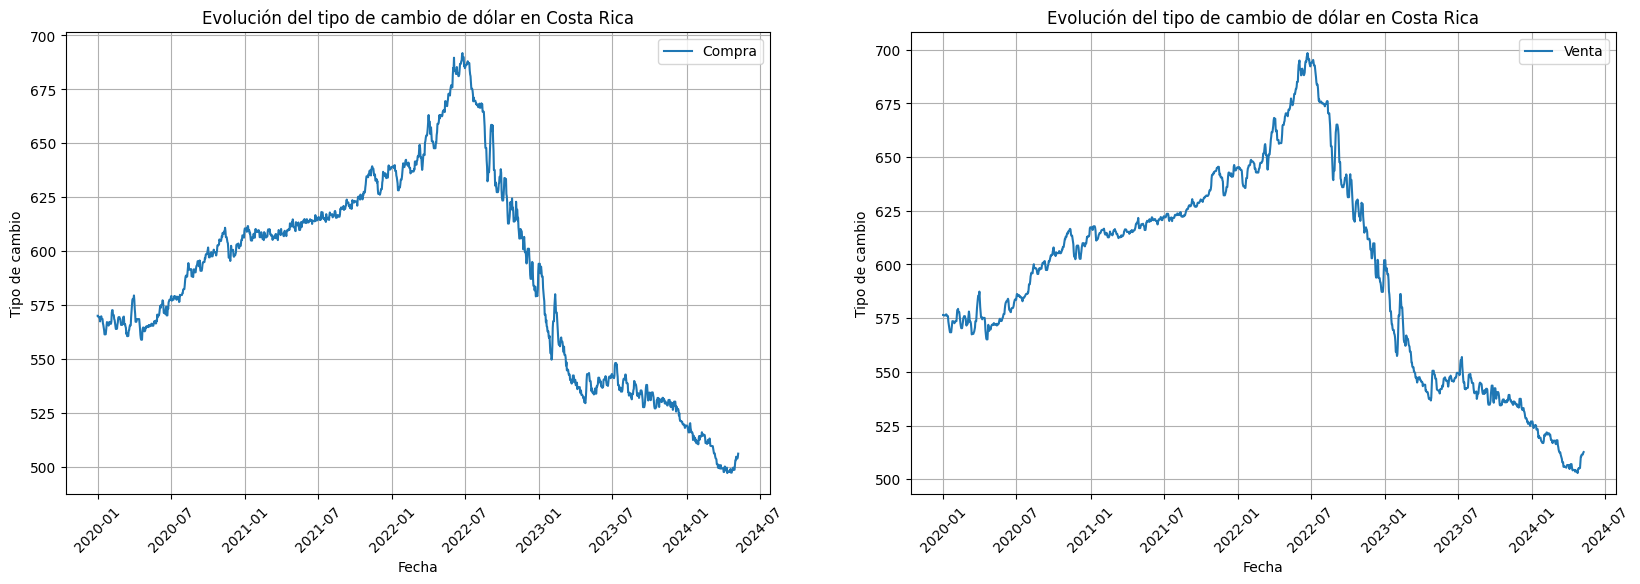

In [35]:
#Parámetros.
fi = '2020-01-01'
ff = '2025-12-31'

#sección de fechas.
fechas = data["DIA"].loc[(data['DIA'] >= fi) & (data['DIA'] <= ff)]

# Tipo de cambio de compra.
tipo_cambio_compra = data["COMPRA"].loc[(data['DIA'] >= fi) & (data['DIA'] <= ff)]

# Tipo de cambio de venta.
tipo_cambio_venta = data["VENTA"].loc[(data['DIA'] >= fi) & (data['DIA'] <= ff)]

# Gráfico de líneas.
plt.figure(figsize=(20, 6))

#Gráfico 1.
plt.subplot(1, 2, 1)
plt.title("Evolución del tipo de cambio de dólar en Costa Rica") 
plt.plot(fechas, tipo_cambio_compra, label="Compra")
plt.xticks(rotation=45)
plt.xlabel("Fecha")
plt.ylabel("Tipo de cambio")
plt.legend()
plt.grid(True)

#Gráfico 2.
plt.subplot(1, 2, 2) 
plt.title("Evolución del tipo de cambio de dólar en Costa Rica")
plt.plot(fechas, tipo_cambio_venta, label="Venta")
plt.xticks(rotation=45)
plt.xlabel("Fecha")
plt.ylabel("Tipo de cambio")
plt.legend()
plt.grid(True)

#Muestra el gráfico.
plt.show()


### 3. Relación entre el tipo de cambio de compra y venta Anual

En este ejercicio, debe explorarar la relación entre el tipo de cambio de compra y venta a lo largo de un año específico, el cual será proporcionado por el usuario mediante un input.

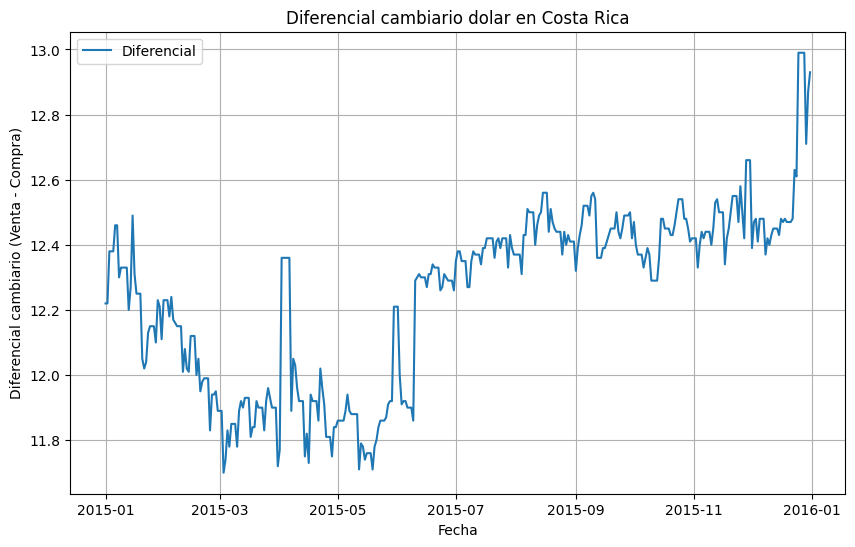

In [42]:
#Captura el año a graficar.
anio = int(input('Digite año: ')) 

#Copia los datos a graficar.
filtrado = data[data['DIA'].dt.year == anio].copy()

# Selección de fechas
fechas = filtrado["DIA"]

#Relación tipo de cambio.
tipo_cambio_relacion = filtrado['VENTA'] - filtrado['COMPRA']

# Gráfico de líneas.
plt.figure(figsize=(10, 6))
plt.plot(fechas, tipo_cambio_relacion, label="Diferencial")
plt.xlabel("Fecha")
plt.ylabel("Diferencial cambiario (Venta - Compra)")
plt.title("Diferencial cambiario dolar en Costa Rica")
plt.legend()
plt.grid(True)

#Despliega el gráfico.
plt.show()

### 4. Gráfico Adicional de Elección Libre

En este ejercicio, tendrás la libertad de crear un gráfico de tu elección relacionado con el tipo de cambio de compra y venta, pero con la condición de que no sea un gráfico lineal.

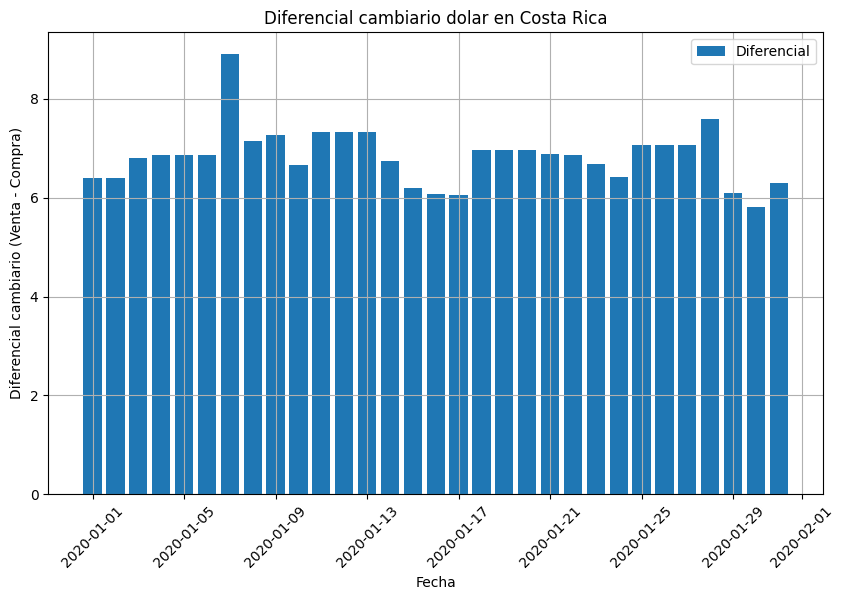

In [37]:
#Captura el año y el mes a graficar.
Anio = 2020
Mes = 1

#Copia los datos a graficar.
filtrado = data.loc[(data['DIA'].dt.year == anio) & (data['DIA'].dt.month == Mes)].copy()

#Selección de fechas.
fechas = filtrado["DIA"]

#Relación tipo de cambio.
tipo_cambio_relacion = filtrado['VENTA'] - filtrado['COMPRA']

# Gráfico de barras.
plt.figure(figsize=(10, 6))
plt.bar(fechas, tipo_cambio_relacion, label="Diferencial")
plt.xlabel("Fecha")
plt.ylabel("Diferencial cambiario (Venta - Compra)")
plt.title("Diferencial cambiario dolar en Costa Rica")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

#Despliega el gráfico.
plt.show()